## 1. Install Dependencies and Setup

In [1]:
# ! pip install opencv-python

In [2]:
# Used tp check the packages installed
! pip list

Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aiohttp                       3.9.1
aiosignal                     1.3.1
altair                        5.0.1
aniso8601                     9.0.1
annotated-types               0.5.0
ansi2html                     1.8.0
anyio                         3.7.1
apiclient                     1.0.4
asttokens                     2.2.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         23.1.0
backcall                      0.2.0
backoff                       2.2.1
beautifulsoup4                4.12.2
blinker                       1.6.2
botocore                      1.34.24
bs4                           0.0.1
cachetools                    5.3.1
certifi                       2023.7.22
chardet                       4.0.0
charset-normalizer            3.2.0
click                         8.1.6
cloudmersive-image-api-client 3.0.1
cloudpickle


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1.1 Install Libraries

In [3]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imghdr

C:\Users\PC\AppData\Local\Temp\ipykernel_9372\1451595789.py:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


### 1.2 Remove Dodgy images

In [4]:
data_dir = 'dataset-original'

In [5]:
# Shows the content in the given folder
os.listdir(data_dir)

['cardboard', 'glass', 'metal', 'paper', 'plastic']

In [6]:
# Creates a folder structure
os.path.join(data_dir, 'cardboard')

# Show the content in the cardboard folder
len(os.listdir(os.path.join(data_dir, 'cardboard')))

403

In [7]:
# Prints out the sub folders
for image_sub in os.listdir(data_dir):
    # Prints all images in the different sub folders
    for image in os.listdir(os.path.join(data_dir, image_sub)):
        image_path = os.path.join(data_dir, image_sub, image)
        # Check if image is in file
        if os.path.isfile(image_path):
            try:
                img = cv2.imread(image_path)

                if image.endswith ('.jpg'):
                    print(f'Image is a valid ')
                else:
                    print(f'Image not available.')
                    os.remove(image_path)

            except Exception as e:
                print(f'There is an issue with {image_path}: {e}')


Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 
Image is a valid 


KeyboardInterrupt: 

In [8]:
# Checks a random image type and shape
random_image = cv2.imread(os.path.join(data_dir, 'cardboard', 'cardboard250.jpg'))
print(f'The image is of type {type(random_image)}')
print(f'The image shape is {random_image.shape}')

The image is of type <class 'numpy.ndarray'>
The image shape is (3024, 4032, 3)


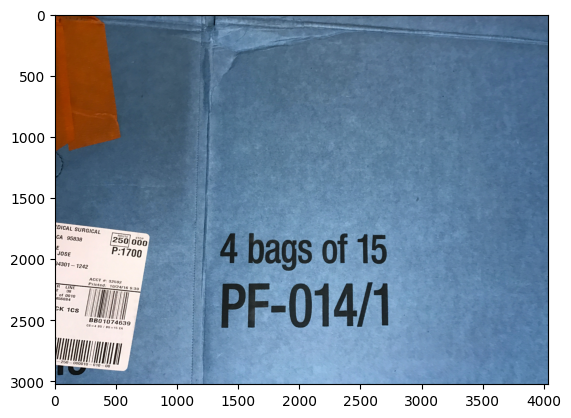

In [9]:
# Plots the image
plt.imshow(random_image)

### 1.3 Load Data

In [10]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [16]:
# Builds a dataset that will be fit to load into the model
# The dataset is not loaded into the computer's memory
image_dataset = tf.keras.utils.image_dataset_from_directory('dataset-original', batch_size=118)

Found 2390 files belonging to 5 classes.


In [17]:
# Iterate through the dataset
image_dataset_iterator = image_dataset.as_numpy_iterator()

In [18]:
# Shows the batch from the iterators 
batch = image_dataset_iterator.next()
batch

(array([[[[215.52344 , 219.21875 , 231.3711  ],
          [215.27734 , 217.125   , 230.17578 ],
          [218.76172 , 221.94922 , 234.35547 ],
          ...,
          [203.51953 , 207.51953 , 216.51953 ],
          [201.      , 205.      , 214.96094 ],
          [201.      , 205.      , 216.40625 ]],
 
         [[216.02734 , 220.02734 , 231.65234 ],
          [216.      , 220.      , 231.875   ],
          [218.      , 220.      , 233.      ],
          ...,
          [203.21875 , 205.21875 , 218.21875 ],
          [201.74219 , 206.3164  , 217.125   ],
          [199.16797 , 201.16797 , 213.16797 ]],
 
         [[218.625   , 217.625   , 232.875   ],
          [219.      , 218.      , 233.75    ],
          [217.      , 221.      , 233.      ],
          ...,
          [202.90625 , 206.90625 , 217.90625 ],
          [203.72656 , 208.08984 , 218.96875 ],
          [201.63672 , 203.63672 , 215.63672 ]],
 
         ...,
 
         [[210.98047 , 216.98047 , 228.98047 ],
          [207.281

In [19]:
# Shape of the images as numpy arrays
batch[0].shape

(118, 256, 256, 3)

In [20]:
# Labels of the 32 images in the current batches
batch[1]

array([1, 1, 2, 3, 4, 0, 0, 0, 4, 0, 1, 2, 2, 2, 1, 2, 4, 0, 3, 1, 2, 1,
       0, 0, 0, 3, 3, 4, 1, 3, 1, 2, 4, 3, 3, 2, 0, 1, 3, 4, 0, 3, 2, 3,
       2, 2, 1, 2, 0, 4, 4, 3, 4, 1, 3, 4, 1, 0, 0, 4, 4, 4, 2, 1, 0, 1,
       3, 2, 1, 1, 3, 3, 3, 3, 0, 3, 3, 0, 4, 1, 0, 3, 1, 1, 4, 2, 3, 1,
       0, 3, 4, 2, 4, 4, 1, 1, 1, 2, 2, 3, 0, 4, 2, 4, 4, 0, 4, 2, 2, 0,
       3, 1, 2, 3, 1, 3, 3, 2])

Index [0] is cardboard.

Index[2] is metal.

Index[4] is plastic.

Index[3] is paper.

Index[1] is glass.

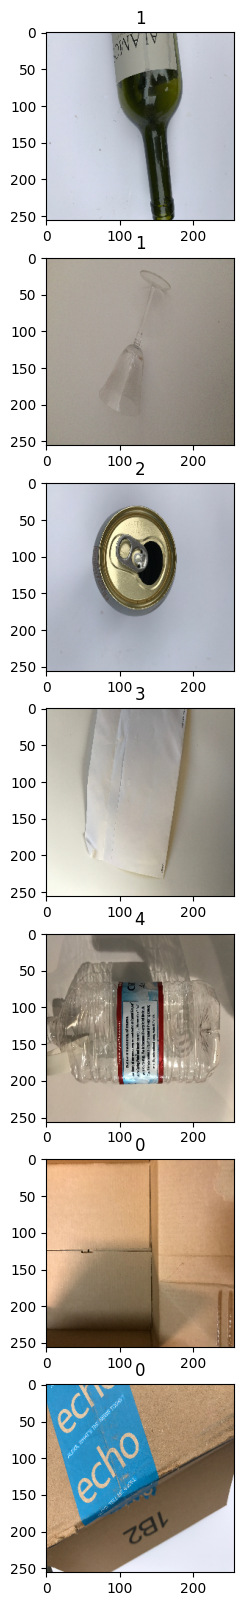

In [21]:
# To confirm the subfolders and their labels
fig, ax = plt.subplots(nrows=7, figsize=(20,20))
for index, image in enumerate(batch[0] [:7]):
    ax[index].imshow(image.astype(int))
    ax[index].title.set_text(batch[1][index])
    


# 2. Data Preprocessing

- This process contains:

    a) Data Standardization

    b) Splitting of data to training, testing and validation sets

### 2.1 Scale Data

In [22]:
# Data Standardization
"""
map() helps in applying the function
lambda() is the function itself with x and y as arguments.
(x/255, y) is the expression that returns the scaled image and its label.
x = images, y= labels
"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# scaled_image_dataset = image_dataset.map(lambda x, y : (x/255, y))
scaled_image_dataset = ImageDataGenerator(rescale = 1/255.0)

In [23]:
scaled_image_dataset.flow_from_directory(scaled_image_dataset, batch_size=batch, class_mode='categorical')

TypeError: listdir: path should be string, bytes, os.PathLike or None, not ImageDataGenerator

In [ ]:
# Check if the images have been scaled successfully
if scaled_image_dataset.as_numpy_iterator().next()[0].min() == 0.0 and scaled_image_dataset.as_numpy_iterator().next()[0].max() == 1.0:
    print('Images have been scaled successfully.')
else:
    print('Process unsuccessfully executed.')

### 2.2 Split Data

In [ ]:
# Check the total number of batches in the dataset
len(scaled_image_dataset)

21

In [ ]:
train_size = int(len(scaled_image_dataset) * 0.7)
validation_size = int(len(scaled_image_dataset) * 0.2)
test_size = int(len(scaled_image_dataset) * 0.1) 

In [ ]:
train = scaled_image_dataset.take(train_size)
validation = scaled_image_dataset.skip(train_size).take(validation_size)
test = scaled_image_dataset.skip(train_size + validation_size).take(test_size)

## 3. Create a Deep Model

In [ ]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Create the model
model = Sequential()

In [ ]:
# Create CNN Architecture
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout regularization
model.add(Dense(1, activation='softmax'))

ValueError: Input 0 of layer "conv2d_14" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 4)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)       

                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4719104   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 5113764 (19.51 MB)
Trainable params: 5113764 (19.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the Model

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=25, validation_data=validation, callbacks=[tensorboard_callback])

ValueError: `y` argument is not supported when using dataset as input.